In [12]:
import os
import glob
import re

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from IPython.display import display


MODELS_PATH = './models/java-small-model'
results = []

In [3]:
models = ['2020_04_05__0.0001_0.0001_0.001__0026d470',
        '2020_04_05__0.0001_0.0001_0.001__2ecc05a5',
        '2020_04_05__0.0001_0.0001_0.001__e152caf0',
        '2020_04_05__0_0_-1__2167eb3d',
        '2020_04_05__0_0_-1__3cff1009',
        '2020_04_05__0_0_-1__4990422c']

In [4]:
models = {'2020_04_07__0_0_-2.0__subtoken_restricted': 24}

In [17]:
models = ['2020_04_09__0_0_-3.0__subtoken_nodes_restricted']

In [2]:
models = ['2020_04_05__0.0001_0.0001_0.001__e152caf0']

In [53]:
coeff_select = [
                 '2020_04_13__1e-05_0.001_-1__556c7315',
                 '2020_04_13__0.0_0.00032_-1__cb617132',
                 '2020_04_13__1e-05_3e-05_-1__26ecce85',
                 '2020_04_13__1e-05_1e-05_-1__d5f7e692',
                 '2020_04_13__1e-05_0.0001_-1__133b3b4a',
                 '2020_04_13__0.0_0.001_-1__2c6b4a81',
                 '2020_04_13__0.0_3e-05_-1__02bbf89b',
                 '2020_04_13__0.0001_0.00032_-1__46537233',
                 '2020_04_13__3e-05_0.001_-1__46a15b73',
                 '2020_04_13__1e-05_0.00032_-1__88e6c7e3',
                 '2020_04_13__0.0_1e-05_-1__acf02da1',
                 '2020_04_13__3e-05_1e-05_-1__e03e1468',
                 '2020_04_13__0.0_0.001_-1__8d50307b',
                 '2020_04_13__3e-05_0.00032_-1__94edc3d2',
                 '2020_04_13__0.0_3e-05_-1__ad2c6b2a',
                 '2020_04_13__0.0_0.0001_-1__c5a5a4c8',
                 '2020_04_13__0.0001_0.0001_-1__d64fba80',
                 '2020_04_13__0.0001_0.001_-1__ca55734c',
                 '2020_04_13__0.0001_3e-05_-1__f6865928',
                 '2020_04_13__0.0_0.0001_-1__f772040c',
                 '2020_04_13__3e-05_3e-05_-1__7502d002',
                 '2020_04_13__0.0_1e-05_-1__b7e86f3e',
                 '2020_04_13__3e-05_0.0001_-1__f83cfcda',
                 '2020_04_13__0.0_0.00032_-1__8cb14a2d',
                 '2020_04_13__0.0001_1e-05_-1__c7b21e93']

In [98]:
coeff_select = ['2020_04_07__0.1_0_-1__b718b076',
                '2020_04_07__0.01_0_-1__53cfd74e',
                '2020_04_07__0.001_0_-1__0f88a7ef',
                '2020_04_07__0.0001_0_-1__92371c27', 
                '2020_04_07__1e-05_0_-1__81cbb810',
                '2020_04_07__1e-06_0_-1__3866b871',
                '2020_04_07__0_0.1_-1__5810e829',
                '2020_04_07__0_0.01_-1__b303bfa9',
                '2020_04_07__0_0.001_-1__facca85d',
                '2020_04_07__0_0.0001_-1__35a3d3de',
                '2020_04_07__0_1e-05_-1__bfb47368',
                '2020_04_07__0_1e-06_-1__be492856',
                '2020_04_05__0_0_-1__2167eb3d']

In [47]:
vocab_words = ['2020_04_11__0_0_-1__632771e7',
               '2020_04_11__0_0_-1__fa0572aa',
               '2020_04_11__0_0_-1__dc65356a',
               '2020_04_05__0_0_-1__2167eb3d',
               '2020_04_13__0_0_-1__2592fca7',
               '2020_04_13__0_0_-1__01b465bd',
               '2020_04_13__0_0_-1__182434f0']

In [2]:
threshold_select  = ['2020_04_21__1e-05_0.0001_0.001__607f3e5d',
                     '2020_04_21__1e-05_0.0001_0.01__a0ea772d',
                     '2020_04_21__1e-05_0.0001_3e-05__829ecb7e',
                     '2020_04_21__1e-05_0.0001_0.00316__eda7e095',
                     '2020_04_21__1e-05_0.0001_0.0__c845667c',
                     '2020_04_21__1e-05_0.0001_0.0001__68faad49',
                     '2020_04_21__1e-05_0.0001_0.0__4ae1c574',
                     '2020_04_21__1e-05_0.0001_1e-05__2c2e103f',
                     '2020_04_21__1e-05_0.0001_0.00032__2a113711',
                     '2020_04_21__1e-05_0.0001_0.0__5c02e2ea',
                     '2020_04_21__1e-05_0.0001_0.0__6d538951',
                     '2020_04_05__0_0_-1__2167eb3d',
                     '2020_04_21__1e-05_0.0001_0.03162__6252cf6e',
                     '2020_04_21__1e-05_0.0001_0.1__2c89f970',
                     '2020_04_21__1e-05_0.0001_0.31623__c8fb4299',
                     '2020_04_21__1e-05_0.0001_1.0__069fade1']

In [141]:
threshold_select = ['2020_04_26__1e-05_0.0001_0.0001__3def0450',
 '2020_04_26__1e-05_0.0001_0.0__2e9a9701',
 '2020_04_26__1e-05_0.0001_0.01__d6293cef',
 '2020_04_26__1e-05_0.0001_3e-05__9ad2b499',
 '2020_04_26__1e-05_0.0001_0.0__b3c3ce5f',
 '2020_04_26__1e-05_0.0001_0.0__98c93f16',
 '2020_04_26__1e-05_0.0001_0.00032__d71bf80c',
 '2020_04_26__1e-05_0.0001_0.00316__d83f6646',
 '2020_04_26__1e-05_0.0001_0.001__a23dca3d',
 '2020_04_26__1e-05_0.0001_1e-05__a8b95222',
 '2020_04_26__1e-05_0.0001_0.0__27e8d9fc',
 '2020_04_26__1e-05_0.0001_0.03162__9220e5cb',
 '2020_04_21__1e-05_0.0001_0.00316__eda7e095',
 '2020_04_26__1e-05_0.0001_0.1__b6a395d8']

In [4]:
threshold_select = ['2020_04_28__1e-05_0.0001_0.01292__e10e822c',
 '2020_04_28__1e-05_0.0001_0.001__54f057c2',
 '2020_04_28__1e-05_0.0001_0.00167__f3194160',
 '2020_04_28__1e-05_0.0001_0.00464__0fea58fc',
 '2020_04_28__1e-05_0.0001_0.00774__0397ddca',
 '2020_04_28__1e-05_0.0001_0.00278__3c0194ac',
 '2020_04_28__1e-05_0.0001_0.02154__4a2bd92a',
 '2020_04_28__1e-05_0.0001_0.05995__adf57025',
 '2020_04_28__1e-05_0.0001_0.03594__4dd0b027',
 '2020_04_28__1e-05_0.0001_0.1__dce2e66f']

In [14]:
models_001_threshhold_comp = ['2020_04_28__1e-05_0.0001_0.00774__0397ddca',
                              '2020_04_26__1e-05_0.0001_0.01__d6293cef']

In [15]:
models = models_001_threshhold_comp

# Best epoch and validation

In [16]:
def get_sublist_idx(x, y):
    l1, l2 = len(x), len(y)
    for i in range(l1):
        if x[i:i + l2] == y:
            return i
    return None


non_decimal = re.compile(r'[^\d.]+')

results = []
for model in models:
    out_files = glob.glob(MODELS_PATH + '/' + model + "/*.out")
    if out_files == []:
        print(model)
        raise "No .out files"
    train_out = out_files[0]
    
    with open(train_out) as f:
        text = f.read().split()
        try:
            s_i = text.index('---------Sparsification')
        except Exception:
            print(model)
            raise Exception
        
        Lasso, GroupLasso, Threshold = map(float, [text[s_i + 4], 
                                                   text[s_i + 8],
                                                   text[s_i + 14]])
        
        try:
            best_epoch = int(non_decimal.sub('', text[-7]))
            val_prec, val_rec, val_F = map(lambda x: float(non_decimal.sub('', x)), [text[-5], text[-3], text[-1]])
        except:
            last_saved_epoch_index = len(text) - text[::-1].index('Saved') + 1
            best_epoch = int(non_decimal.sub('', text[last_saved_epoch_index]))
            after_index = get_sublist_idx(text, ['After', str(best_epoch)])
            val_prec, val_rec, val_F = map(lambda x: float(non_decimal.sub('', x)), [text[after_index + 4], 
                                                                                     text[after_index + 6], 
                                                                                     text[after_index + 8]])
            
        
        subtoken_words, nodes_words = map(lambda x: int(non_decimal.sub('', x)), [text[6], text[17]])
        
        
        results.append([model, subtoken_words, nodes_words, Lasso, GroupLasso, Threshold, 
                        best_epoch, val_prec, val_rec, val_F])
        
    
    err_files = glob.glob(MODELS_PATH + '/' + model + "/*.err")
    if err_files == []:
        print(model)
        raise "No .out files"
    errors_out = err_files[0]
    
    with open(errors_out) as f:
        text = f.read().split()
        
        index = get_sublist_idx(text, ['Indicators', 'after', str(best_epoch), 'epochs:'])
        
        if not(index):
            raise 'Not found results in .err'
        _, _, nodes_words_left, subtoken_words_left, _, _ = \
                            list(filter(None, re.split(r'[\]\[]', text[index + 17])))
        nodes_words_left = int(nodes_words_left)
        subtoken_words_left =  int(subtoken_words_left)
        
        results[-1] += [subtoken_words_left, nodes_words_left]

In [17]:
results = pd.DataFrame(results, 
     columns=['folder', 'SUBTOKEN_words_max', 'NODES_words_max', 
              'Lasso', 'GroupLasso', 'Threshold', 'best_epoch', 'Val_Prec', 'Val_Rec', 'Val_F1',
              'SUBTOKEN_words_left', 'NODES_words_left'])

In [18]:
results

,folder,SUBTOKEN_words_max,NODES_words_max,Lasso,GroupLasso,Threshold,best_epoch,Val_Prec,Val_Rec,Val_F1,SUBTOKEN_words_left,NODES_words_left
0,2020_04_28__1e-05_0.0001_0.00774__0397ddca,73906,323,0.00001,0.0001,0.007743,68,0.49116,0.38550,0.43196,33177,323
1,2020_04_26__1e-05_0.0001_0.01__d6293cef,73906,323,0.00001,0.0001,0.010000,72,0.47877,0.36986,0.41732,18876,323


# Release

In [9]:
for index, row in results.iterrows():
    folder = results.iloc[index]['folder']
    epoch = results.iloc[index]['best_epoch']
    command = f'python code2seq.py --load models/java-small-model/{folder}/model_iter{epoch} --release'
    os.system(f'sbatch --error=./slurm/%j.err --output=./slurm/%j.out -J c2s_release --gres=gpu:1 -c 4 --wrap=\"{command}\"')

# Test

In [26]:
for index, row in results.iterrows():
    folder = results.iloc[index]['folder']
    epoch = results.iloc[index]['best_epoch']
    command = f'python3 code2seq.py --load {MODELS_PATH}/{folder}/model_iter{epoch}.release --test data/java-small/java-small.test.c2s'
    os.system(f'sbatch --error=./slurm/{folder}.err --output=./slurm/{folder}.out -J c2s_test --gres=gpu:1 -c 4 --wrap=\"{command}\"')


# Get test results

In [19]:
import pandas as pd

results['Test_Prec'] = 0.
results['Test_Rec'] = 0.
results['Test_F1'] = 0.

for index, row in results.iterrows():
    folder = results.iloc[index]['folder']
    epoch = results.iloc[index]['best_epoch']
    
    with open(f'./slurm/{folder}.out') as f:
        text = f.read().split()
        try:
            prec_i = text.index('Precision:') + 1
            rec_i = text.index('recall:') + 1   
            f_i = text.index('F1:') + 1
        except:
            print(results['folder'][index])
            raise
        
        prec, rec, f = list(map(lambda a: float(a.rstrip(',')), [text[prec_i], text[rec_i], text[f_i]]))
        results['Test_Prec'][index] = prec
        results['Test_Rec'][index] = rec
        results['Test_F1'][index] = f

/home/aagusev2/anaconda3/envs/tf_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/aagusev2/anaconda3/envs/tf_env/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/aagusev2/anaconda3/envs/tf_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
sorted_results = results[[ 'Lasso', 'GroupLasso', 'Threshold', 'best_epoch', 'Val_Prec', 'Val_Rec', 'Val_F1', 'Test_Prec',
'Test_Rec', 'Test_F1', 'SUBTOKEN_words_left', 'NODES_words_left']].sort_values(by=['Threshold'], ascending=False)

display(sorted_results)

display(results.groupby(['Lasso', 'GroupLasso', 'Threshold']).mean()[['Val_Prec', 'Val_Rec', 'Val_F1', 
                                                                      'Test_Prec', 'Test_Rec', 'Test_F1']])

,Lasso,GroupLasso,Threshold,best_epoch,Val_Prec,Val_Rec,Val_F1,Test_Prec,Test_Rec,Test_F1,SUBTOKEN_words_left,NODES_words_left
9,0.00001,0.0001,0.100000,3,0.35657,0.24587,0.29105,0.388368,0.261442,0.312509,73906,323
7,0.00001,0.0001,0.059948,12,0.40388,0.31775,0.35567,0.430251,0.325157,0.370394,73904,323
8,0.00001,0.0001,0.035938,10,0.43813,0.33352,0.37874,0.471930,0.340927,0.395872,73906,323
6,0.00001,0.0001,0.021544,37,0.47029,0.36336,0.40997,0.483603,0.361338,0.413625,52748,323
0,0.00001,0.0001,0.012915,44,0.47529,0.35945,0.40934,0.484411,0.366362,0.417197,62779,323
4,0.00001,0.0001,0.007743,68,0.49116,0.38550,0.43196,0.483934,0.377749,0.424299,33177,323
3,0.00001,0.0001,0.004642,67,0.47899,0.37939,0.42342,0.483601,0.376568,0.423425,50718,323
5,0.00001,0.0001,0.002783,58,0.48330,0.38402,0.42798,0.479336,0.380913,0.424494,67525,323
2,0.00001,0.0001,0.001668,83,0.47725,0.37495,0.41996,0.486077,0.376288,0.424194,50518,323
1,0.00001,0.0001,0.001000,26,0.47058,0.36101,0.40858,0.495840,0.368252,0.422626,73906,323


Val_Prec  Val_Rec   Val_F1  Test_Prec  Test_Rec  \
Lasso   GroupLasso Threshold                                                    
0.00001 0.0001     0.001000    0.47058  0.36101  0.40858   0.495840  0.368252   
                   0.001668    0.47725  0.37495  0.41996   0.486077  0.376288   
                   0.002783    0.48330  0.38402  0.42798   0.479336  0.380913   
                   0.004642    0.47899  0.37939  0.42342   0.483601  0.376568   
                   0.007743    0.49116  0.38550  0.43196   0.483934  0.377749   
                   0.012915    0.47529  0.35945  0.40934   0.484411  0.366362   
                   0.021544    0.47029  0.36336  0.40997   0.483603  0.361338   
                   0.035938    0.43813  0.33352  0.37874   0.471930  0.340927   
                   0.059948    0.40388  0.31775  0.35567   0.430251  0.325157   
                   0.100000    0.35657  0.24587  0.29105   0.388368  0.261442   

                               Test_F1  
Lasso   GroupLasso Threshold            
0.00001 0.0001     0.001000   0.422626  
                   0.001668   0.424194  
                   0.002783   0.424494  
                   0.004642   0.423425  
                   0.007743   0.424299  
                   0.012915   0.417197  
                   0.021544   0.413625  
                   0.035938   0.395872  
                   0.059948   0.370394  
                   0.100000   0.312509

# Sparsification by epochs

In [24]:
plt.figure(figsize=(18, 10))

for index, row in results.iterrows():
    folder = results.iloc[index]['folder']
    best_epoch = results.iloc[index]['best_epoch']
    threshold = results.iloc[index]['Threshold']
    
    soubtoken_vocab_left_history = []
    nodes_vocab_left_history = []
    
    err_files = glob.glob(MODELS_PATH + '/' + folder + "/*.err")
    if err_files == []:
        print(model)
        raise "No .out files"
    errors_out = err_files[0]
    
    with open(errors_out) as f:
        text = f.read().split()
        
        for epoch in range(1, best_epoch + 1):
            index = get_sublist_idx(text, ['Indicators', 'after', str(epoch), 'epochs:'])
            if not(index):
                raise 'Not found results in .err'
            _, _, nodes_words_left, subtoken_words_left, _, _ = \
                                list(filter(None, re.split(r'[\]\[]', text[index + 17])))
            nodes_words_left = int(nodes_words_left)
            subtoken_words_left =  int(subtoken_words_left)

            soubtoken_vocab_left_history.append(subtoken_words_left)
            nodes_vocab_left_history.append(nodes_words_left)

#     fig, axs = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

#     axs[0].plot(range(1, best_epoch + 1), nodes_vocab_left_history)
#     axs[0].set_ylabel('NODES_words_left')
#     axs[0].grid(True)

#     axs[1].plot(range(1, best_epoch + 1), soubtoken_vocab_left_history)
#     axs[1].set_ylabel('SUBTOKEN_words_left')
#     axs[1].grid(True)

#     fig.suptitle('Sparsification by epoch')
#     plt.xlabel('epoch')
#     plt.show()

    

    plt.plot(range(1, best_epoch + 1), soubtoken_vocab_left_history, label=str(threshold))
    
    

fig.suptitle('Sparsification by epoch')
plt.ylabel('SUBTOKEN_words_left')
plt.xlabel('epoch')
plt.legend()

plt.show()

    

KeyError: 'threshold'

<Figure size 1296x720 with 0 Axes>

# Graphics

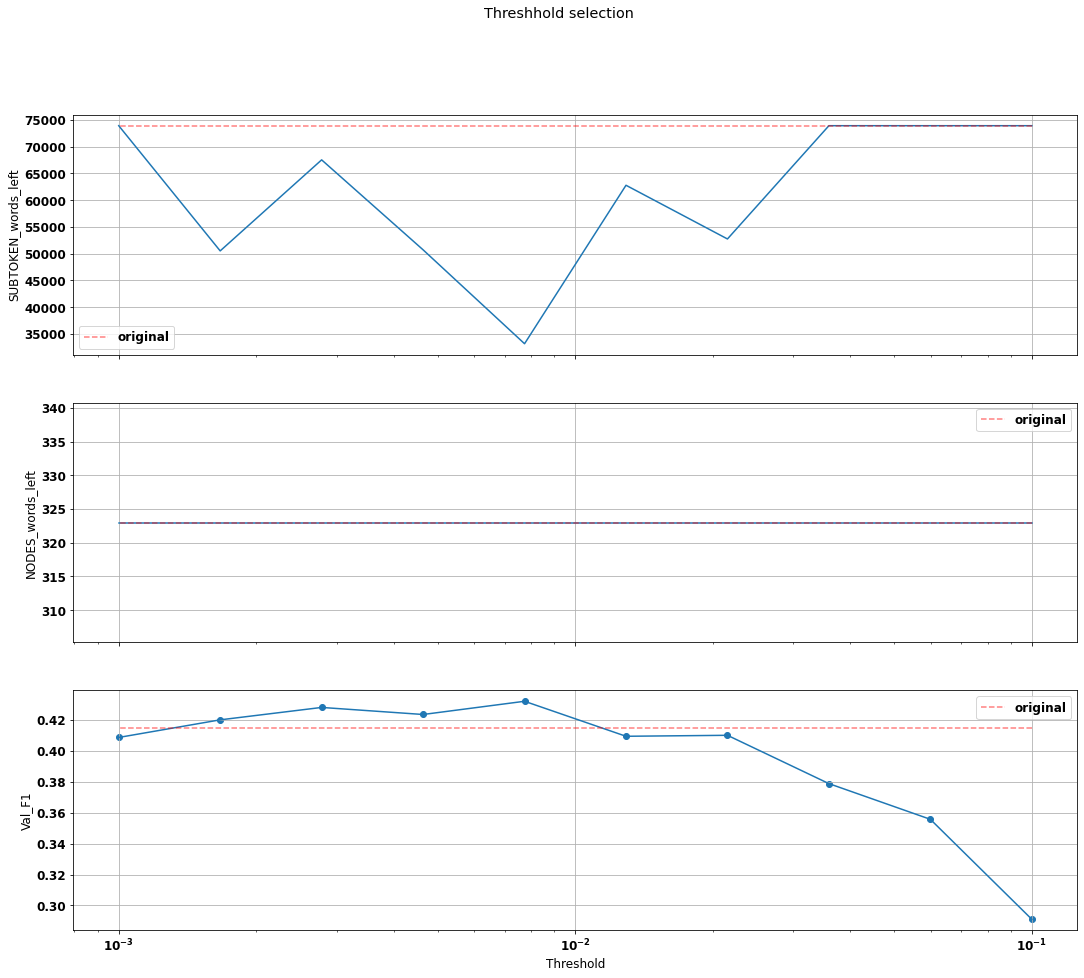

In [61]:
fig, axs = plt.subplots(3, 1, figsize=(18, 15), sharex=True)

orig_f1, orig_subtoken, orig_nodes = np.ones((3, sorted_results['Threshold'].size)) * \
                                        np.array([0.41495, 73906, 323]).reshape((-1, 1))

axs[0].plot(sorted_results['Threshold'], sorted_results['SUBTOKEN_words_left'])
axs[0].set_ylabel('SUBTOKEN_words_left')
axs[0].plot(sorted_results['Threshold'], orig_subtoken, color='red', linestyle='--', alpha=0.5, label='original')
axs[0].grid(True)
axs[0].legend()
# axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[1].plot(sorted_results['Threshold'], sorted_results['NODES_words_left'])
axs[1].plot(sorted_results['Threshold'], orig_nodes, color='red', linestyle='--', alpha=0.5, label='original')
axs[1].set_ylabel('NODES_words_left')
axs[1].grid(True)
axs[1].legend()
# axs[1].set_yscale('log')

axs[2].plot(sorted_results['Threshold'], sorted_results['Val_F1'])
axs[2].plot(sorted_results['Threshold'], orig_f1, color='red', linestyle='--', alpha=0.5, label='original')
axs[2].scatter(results['Threshold'], results['Val_F1'])
axs[2].set_ylabel('Val_F1')
axs[2].grid(True)
axs[2].legend()
# axs[2].set_yscale('log')

fig.suptitle('Threshhold selection')
plt.xlabel('Threshold')
plt.grid(True)
plt.show()

In [155]:
sorted_results

,Lasso,GroupLasso,Threshold,best_epoch,Val_Prec,Val_Rec,Val_F1,Test_Prec,Test_Rec,Test_F1,SUBTOKEN_words_left,NODES_words_left
13,0.00001,0.0001,1.000000e-01,3,0.34818,0.25184,0.29228,0.382684,0.259358,0.309177,73906,323
11,0.00001,0.0001,3.162278e-02,30,0.45581,0.35344,0.39815,0.466970,0.346890,0.398072,45001,323
2,0.00001,0.0001,1.000000e-02,72,0.47877,0.36986,0.41732,0.491030,0.372205,0.423439,18876,323
7,0.00001,0.0001,3.162278e-03,52,0.47880,0.37590,0.42116,0.475847,0.377491,0.421000,71451,323
12,0.00001,0.0001,3.162278e-03,41,0.48437,0.38149,0.42682,0.491045,0.377709,0.426984,73867,323
8,0.00001,0.0001,1.000000e-03,51,0.48721,0.38234,0.42845,0.481329,0.381639,0.425726,73080,323
6,0.00001,0.0001,3.162278e-04,53,0.48480,0.38905,0.43168,0.479288,0.383293,0.425949,72804,323
0,0.00001,0.0001,1.000000e-04,69,0.48366,0.38476,0.42858,0.480635,0.379529,0.424140,64458,323
3,0.00001,0.0001,3.162278e-05,61,0.48323,0.38615,0.42927,0.476453,0.383354,0.424863,69546,323
9,0.00001,0.0001,1.000000e-05,51,0.48105,0.38894,0.43012,0.481209,0.383846,0.427048,73308,323


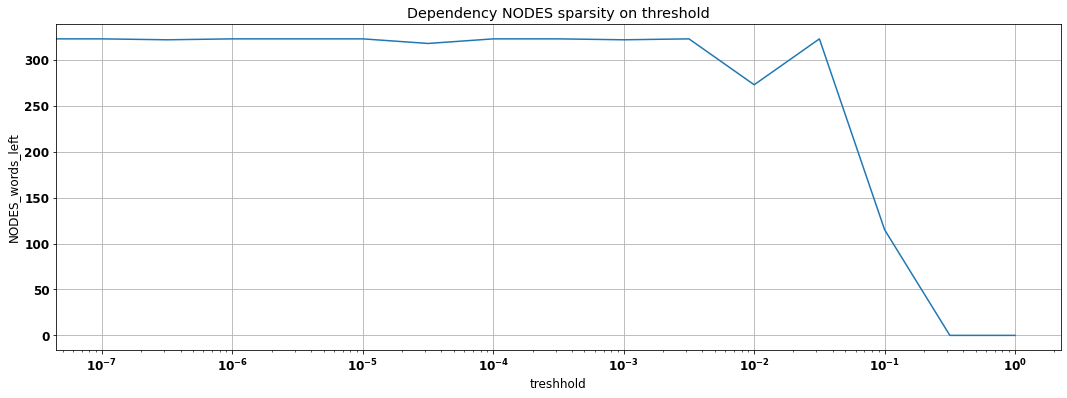

In [116]:
from matplotlib import pyplot as plt
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)


plt.figure(figsize=(18, 6))

plt.title('Dependency NODES sparsity on threshold')
plt.xticks(results['Threshold'])
plt.xlabel('treshhold')
plt.ylabel('NODES_words_left')
plt.xscale('log')
plt.plot(results['Threshold'], results['NODES_words_left'])

plt.grid()
plt.show()

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)


plt.figure(figsize=(18, 6))

plt.title('Dependency validation F1-score on threshold')
plt.xticks(results['Threshold'])
plt.xlabel('treshhold')
plt.ylabel('Val_F1')
plt.xscale('log')
plt.plot(results['Threshold'], results['Val_F1'])

plt.grid()
plt.show()

In [70]:
! pip install matplotlib

## Get sorted by time folders

In [2]:
import os

models_dir = "./models/java-small-model"
os.chdir(models_dir)
search_dir = './'
model_folders = filter(os.path.isdir, os.listdir(search_dir))
model_folders = [os.path.join(search_dir, f) for f in model_folders] # add path to each file
model_folders.sort(key=lambda x: os.path.getmtime(x), reverse=True)
back_dir = "./../../"
os.chdir(back_dir)

In [5]:
list(map(lambda s: s[2:], model_folders[:16]))

['2020_04_28__1e-05_0.0001_0.01292__e10e822c',
 '2020_04_28__1e-05_0.0001_0.001__54f057c2',
 '2020_04_28__1e-05_0.0001_0.00167__f3194160',
 '2020_04_28__1e-05_0.0001_0.00464__0fea58fc',
 '2020_04_28__1e-05_0.0001_0.00774__0397ddca',
 '2020_04_28__1e-05_0.0001_0.00278__3c0194ac',
 '2020_04_28__1e-05_0.0001_0.02154__4a2bd92a',
 '2020_04_28__1e-05_0.0001_0.05995__adf57025',
 '2020_04_28__1e-05_0.0001_0.03594__4dd0b027',
 '2020_04_28__1e-05_0.0001_0.1__dce2e66f',
 '2020_04_28__1e-05_0.0001_0.00278__4df3fa14',
 '2020_04_28__1e-05_0.0001_0.001__420e4a16',
 '2020_04_28__1e-05_0.0001_0.00464__4415c74f',
 '2020_04_28__1e-05_0.0001_0.00774__7cda578e',
 '2020_04_28__1e-05_0.0001_0.00167__cba9bd6b',
 '2020_04_21__1e-05_0.0001_0.00316__eda7e095']

In [6]:
results

,jobID,lasso,group_lasso,threshold,epochs,Precision,recall,F1,NODES_VOCAB nonzeros,SUBTOKEN_VOCAB nonzeros,Lasso Reg,Group Lasso Reg
0,34508,0.0001,0.0001,1.000000e-03,24,0.47440,0.35912,0.40879,1236,30258,0.225216,0.065769
1,34510,0.0001,0.0001,1.000000e-05,64,0.46884,0.36772,0.41217,1486,74339,0.271612,0.061684
2,34511,0.0001,0.0001,1.000000e-06,75,0.46578,0.37260,0.41401,3986,148216,0.301428,0.062066
3,34512,0.0001,0.0001,1.000000e-07,24,0.46324,0.36765,0.40995,18028,6730523,0.408273,0.073424
4,34513,0.0000,0.0001,1.000000e-05,37,0.46248,0.36882,0.41037,40333,9413252,0.000000,4.115718
5,34514,0.0001,0.0000,1.000000e-05,60,0.47707,0.38251,0.42459,1434,73891,0.316947,0.000000


In [57]:
! squeue

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
             58193    normal     vasp  isaitov PD       0:00      3 (Resources)
             58194    normal     vasp  isaitov PD       0:00      3 (Priority)
             58197    normal BAR_0.0_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58198    normal BAR_0.2_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58199    normal BAR_0.3_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58200    normal BAR_0.4_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58201    normal BAR_0.5_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58202    normal BAR_0.6_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58203    normal BAR_0.7_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58204    normal BAR_0.8_  ybudkov PD       0:00      1 (QOSMaxCpuPerUserLimit)
             58205  